In [1]:
!python --version
import tensorflow as tf
print(tf.__version__)

Python 3.10.12
2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Input, Lambda
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Dropout
from tensorflow.keras import regularizers
from keras.models import Model
import itertools
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt
import warnings
import PIL
import cv2
%matplotlib inline
import seaborn as sns

In [4]:
train_path='/content/gdrive/MyDrive/GWAR_Project/Augmented'
test_path='/content/gdrive/MyDrive/GWAR_Project/Valid'

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
train_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=train_path, target_size=IMAGE_SIZE, classes=['Apple_Healthy', 'Apple_Unhealthy_1', 'Apple_Unhealthy_2', 'Corn_Healthy', 'Corn_Unhealthy_1', 'Corn_Unhealthy_2', 'Tomato_Healthy', 'Tomato_Unhealthy_1', 'Tomato_Unhealthy_2' ], batch_size=32)

test_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=test_path, target_size=IMAGE_SIZE, classes=['Apple_Healthy', 'Apple_Unhealthy_1', 'Apple_Unhealthy_2', 'Corn_Healthy', 'Corn_Unhealthy_1', 'Corn_Unhealthy_2', 'Tomato_Healthy', 'Tomato_Unhealthy_1', 'Tomato_Unhealthy_2'], batch_size=32, shuffle=False)

Found 6426 images belonging to 9 classes.
Found 801 images belonging to 9 classes.


In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
# don't train existing weights  # Dont run this for now
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('/content/gdrive/MyDrive/GWAR_Project/Augmented/*')
(folders)

['/content/gdrive/MyDrive/GWAR_Project/Augmented/Apple_Healthy',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Apple_Unhealthy_2',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Corn_Healthy',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Corn_Unhealthy_2',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Tomato_Healthy',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Tomato_Unhealthy_1',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Tomato_Unhealthy_2',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Apple_Unhealthy_1',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Corn_Unhealthy_1']

In [10]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
opt = Adam(learning_rate=0.0001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [14]:
r = model.fit(
  x=train_batches,
  validation_data=test_batches,
  epochs=10,
  steps_per_epoch=len(train_batches)
)

Epoch 1/10
201/201 [==============================] - 3134s 16s/step - loss: 0.6059 - accuracy: 0.8534 - val_loss: 0.2138 - val_accuracy: 0.9675
Epoch 2/10
201/201 [==============================] - 34s 169ms/step - loss: 0.1747 - accuracy: 0.9653 - val_loss: 0.1294 - val_accuracy: 0.9750
Epoch 3/10
201/201 [==============================] - 35s 173ms/step - loss: 0.1096 - accuracy: 0.9798 - val_loss: 0.0876 - val_accuracy: 0.9838
Epoch 4/10
201/201 [==============================] - 35s 176ms/step - loss: 0.0779 - accuracy: 0.9877 - val_loss: 0.0703 - val_accuracy: 0.9838
Epoch 5/10
201/201 [==============================] - 34s 167ms/step - loss: 0.0592 - accuracy: 0.9914 - val_loss: 0.0618 - val_accuracy: 0.9825
Epoch 6/10
201/201 [==============================] - 34s 168ms/step - loss: 0.0468 - accuracy: 0.9942 - val_loss: 0.0523 - val_accuracy: 0.9875
Epoch 7/10
201/201 [==============================] - 34s 169ms/step - loss: 0.0374 - accuracy: 0.9975 - val_loss: 0.0466 - val_ac

In [15]:
score = model.evaluate(test_batches,verbose=0)
print('Test Loss: ',score[0])
print('Test accuracy: ',score[1])
print(score)

Test Loss:  0.03909217193722725
Test accuracy:  0.9875156283378601
[0.03909217193722725, 0.9875156283378601]


26/26 [==============================] - 4s 143ms/step


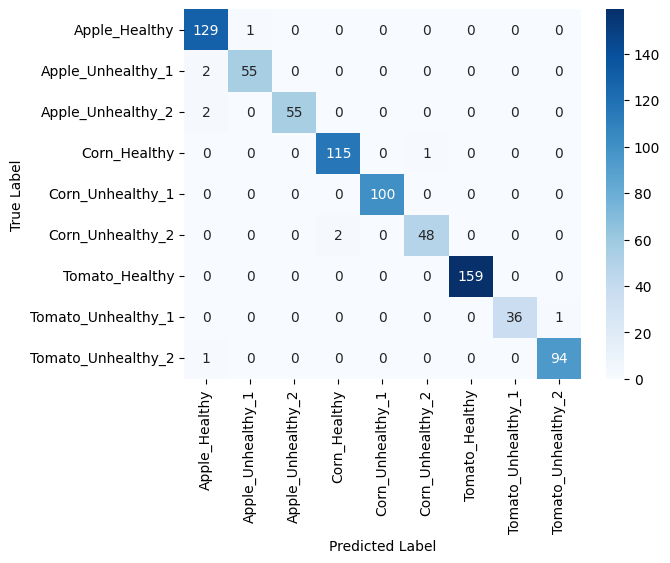

                    precision    recall  f1-score   support

     Apple_Healthy       0.96      0.99      0.98       130
 Apple_Unhealthy_1       0.98      0.96      0.97        57
 Apple_Unhealthy_2       1.00      0.96      0.98        57
      Corn_Healthy       0.98      0.99      0.99       116
  Corn_Unhealthy_1       1.00      1.00      1.00       100
  Corn_Unhealthy_2       0.98      0.96      0.97        50
    Tomato_Healthy       1.00      1.00      1.00       159
Tomato_Unhealthy_1       1.00      0.97      0.99        37
Tomato_Unhealthy_2       0.99      0.99      0.99        95

          accuracy                           0.99       801
         macro avg       0.99      0.98      0.99       801
      weighted avg       0.99      0.99      0.99       801



In [16]:
predictions = model.predict(test_batches, steps=len(test_batches))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

conf_mat = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [17]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


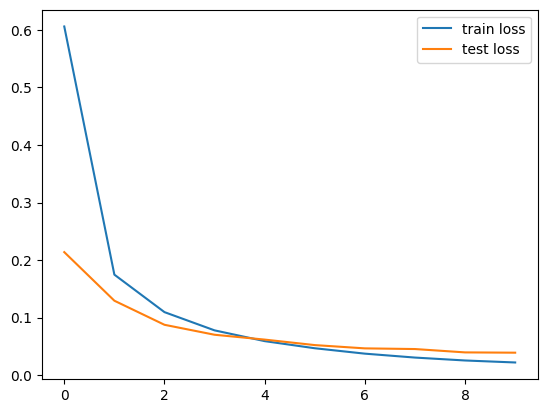

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('Train_Test_loss')

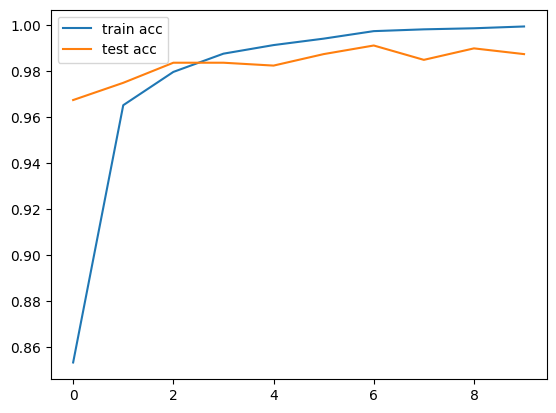

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('Train_Test_acc')